In [15]:
%matplotlib inline

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path

In [18]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/homelesess_2012_2022.csv')
# Read the csv file
homelesess_df = pd.read_csv(file_path)
# Display data
homelesess_df.head()


,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,"2,320","1,949","1,949","1,907","2,016","1,845","1,940","1,956","1,784","1,946","1,913"
1,AL,"3,752","2,556","3,351","3,261","3,434","3,793","4,111","3,970","4,561","4,689","5,209"
2,AR,"2,459","2,139","2,366","2,717","2,712","2,467","2,463","2,560","2,936","3,812","4,214"
3,AS,,,,,,,,,,,
4,AZ,"13,553","5,460","10,979","10,007","9,865","8,947","9,707","9,896","10,495","10,562","11,302"


In [19]:
condition = (homelesess_df['State'] != 'AS')
# Use boolean indexing to select and keep rows that satisfy the condition
homelesess_df_clean = homelesess_df[condition]

#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'State'

# Convert all values to float except the specified object column
homelesess_df_clean = homelesess_df_clean.replace(',','', regex = True)
homelesess_df_clean.loc[:, homelesess_df_clean.columns != object_column] = homelesess_df_clean.loc[:, homelesess_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')
homelesess_df_clean.head()

,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,2320,1949,1949,1907,2016,1845,1940,1956,1784,1946,1913
1,AL,3752,2556,3351,3261,3434,3793,4111,3970,4561,4689,5209
2,AR,2459,2139,2366,2717,2712,2467,2463,2560,2936,3812,4214
4,AZ,13553,5460,10979,10007,9865,8947,9707,9896,10495,10562,11302
5,CA,171521,57468,161548,151278,129972,131532,118142,115738,113952,118552,120098


Enter the year in a range 2012 - 2022:  2015


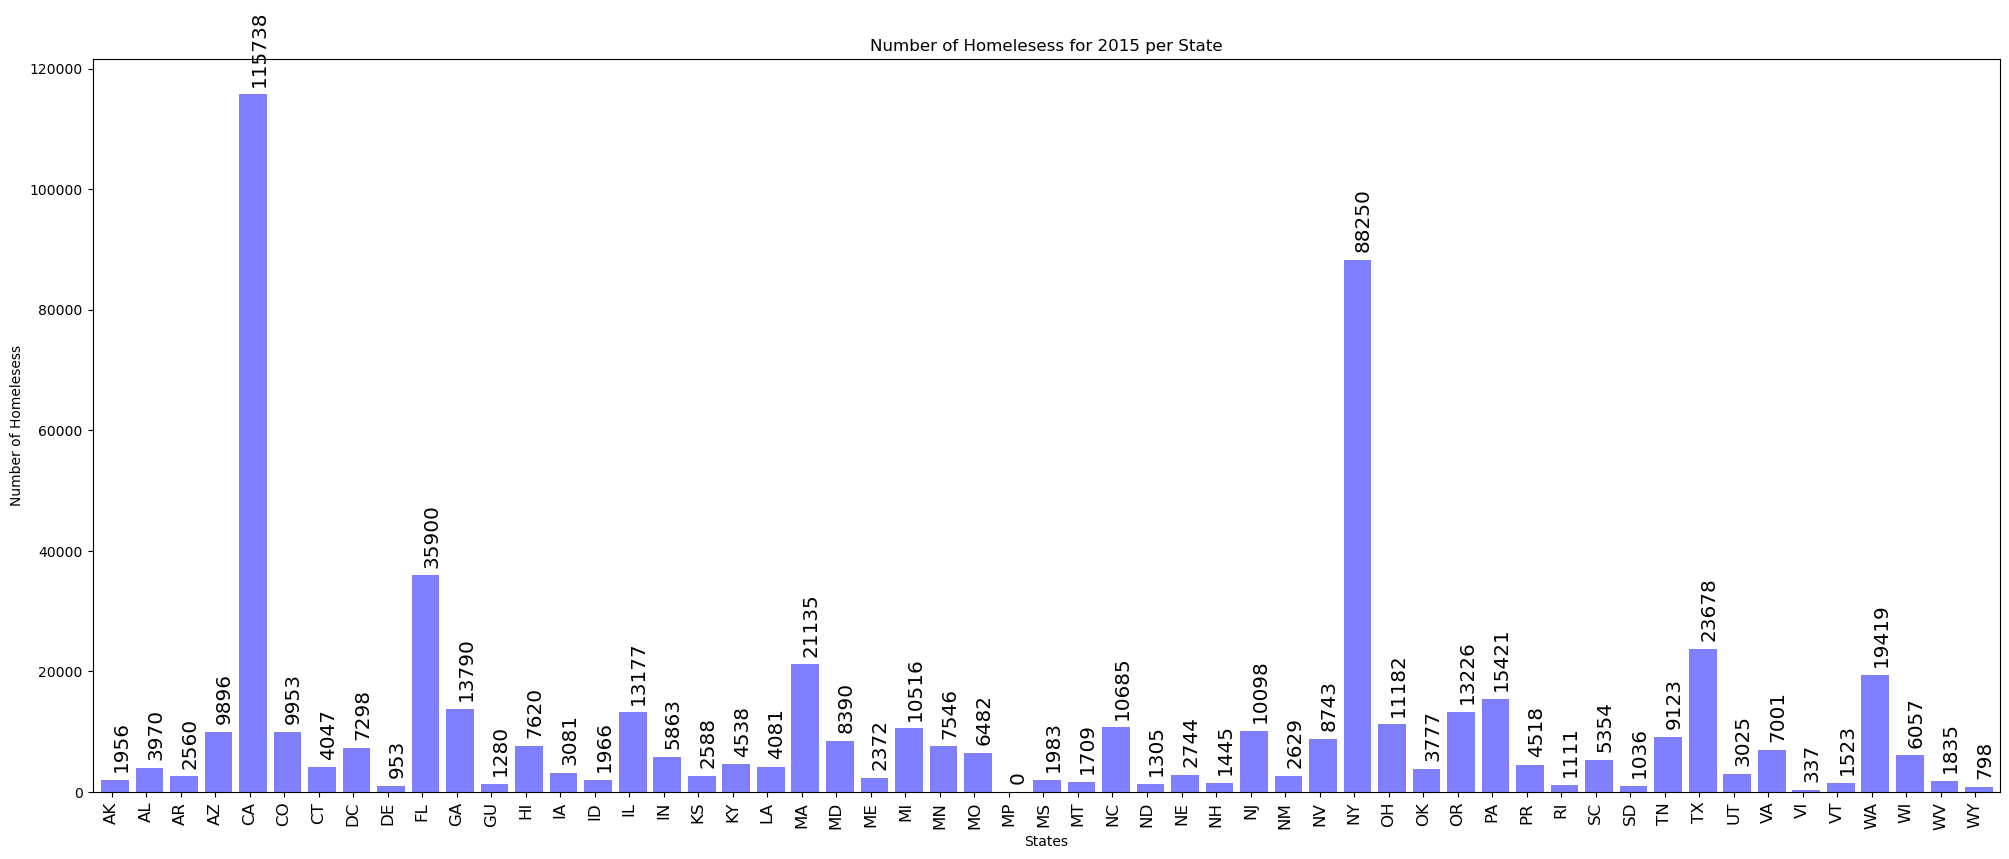

In [21]:
x_axis = np.arange(len(homelesess_df_clean))
value_for_year = input("Enter the year in a range 2012 - 2022: ")
year_value = "Overall Homeless, " + value_for_year
tick_locations = [value + 0.3 for value in x_axis]
plt.figure(figsize=(20,8))
plt.xlim(-0.25, len(x_axis))
plt.bar(x_axis, homelesess_df_clean[year_value], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations , homelesess_df_clean["State"],rotation="vertical",size = 'large')
plt.tight_layout()
y = homelesess_df_clean[year_value]
for index, value in enumerate(y):
    plt.text(index + 0.3, value + 2000,
             str(value), size = 'x-large',rotation="vertical")
plt.title(f"Number of Homelesess for {value_for_year} per State")
plt.xlabel("States")
plt.ylabel("Number of Homelesess")
plt.savefig("../Outputs/HUD_bar_chat.png")
plt.show()

In [22]:
# Set the 'State' to be our index for easy referencing of rows
if 'State' in homelesess_df_clean.columns:
    homelesess_df_clean.set_index("State", inplace=True)
else:
    print("Warning: 'State' column not found in DataFrame.")
    
homelesess_df_yearly = homelesess_df_clean.rename(columns={'Overall Homeless, 2022' : '2022', 'Overall Homeless, 2021': '2021',
       'Overall Homeless, 2020' : '2020', 'Overall Homeless, 2019' : '2019',
       'Overall Homeless, 2018' : '2018', 'Overall Homeless, 2017' : '2017',
       'Overall Homeless, 2016' : '2016', 'Overall Homeless, 2015' : '2015',
       'Overall Homeless, 2014': '2014', 'Overall Homeless, 2013' : '2013',
       'Overall Homeless, 2012': '2012'})
homelesess_df_yearly.head()
homelesess_df_yearly.to_csv('../Resources/HUD_States_Data.csv')

Enter state code :  MI


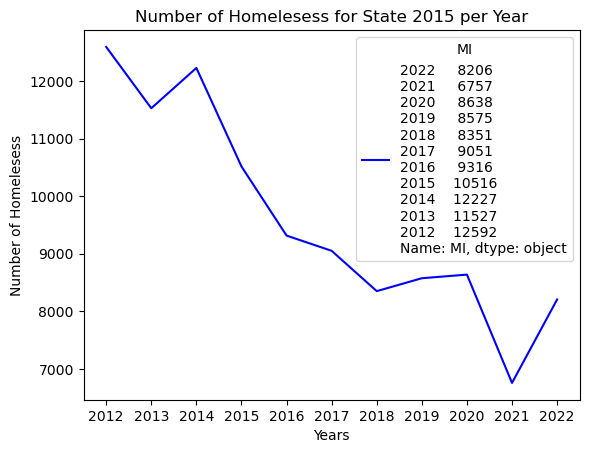

In [23]:
#Enter state code to plot graph
state_value = input('Enter state code : ')
# Collect the homelesess number
average_homelesess = homelesess_df_yearly[[str(year) for year in range(2012, 2023)]].mean()

# Collect the years where data was collected
years = average_homelesess.keys()
# Plot the homelesess values for a single state
state_one = plt.plot(years, homelesess_df_yearly.loc[state_value,["2012","2013","2014","2015","2016","2017",
                                                                  "2018","2019","2020","2021","2022"]],
                                             color="blue",label=homelesess_df_yearly.loc[state_value])

# Create a legend for our chart
#plt.legend(handles=[state_one], loc="best")
plt.legend(title = state_value, loc="best")
plt.title(f"Number of Homelesess for State {value_for_year} per Year")
plt.xlabel("Years")
plt.ylabel("Number of Homelesess")
plt.savefig("../Outputs/HUD_state_graph")
# Show the chart
plt.show()

In [ ]:
average_homelesess


In [ ]:
homelesess_df_yearly
